# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sinasc = pd.read_csv('https://raw.githubusercontent.com/vinisavordelli/exercicios_ebac/main/Ci%C3%AAncia%20de%20Dados/Exercicio_5/SINASC_RO_2019.csv', sep=',')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [129]:
sinasc['APGAR5_CAT'] = pd.cut(sinasc['APGAR5'], bins=[-1, 3, 5, 7, 10], labels=['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal'])
test = sinasc[['APGAR5', 'APGAR5_CAT']]
test.head(21)

,APGAR5,APGAR5_CAT
0,10.0,normal
1,9.0,normal
2,10.0,normal
3,10.0,normal
4,10.0,normal
5,10.0,normal
6,10.0,normal
7,10.0,normal
8,9.0,normal
9,10.0,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

<Axes: xlabel='SEXO', ylabel='APGAR5'>

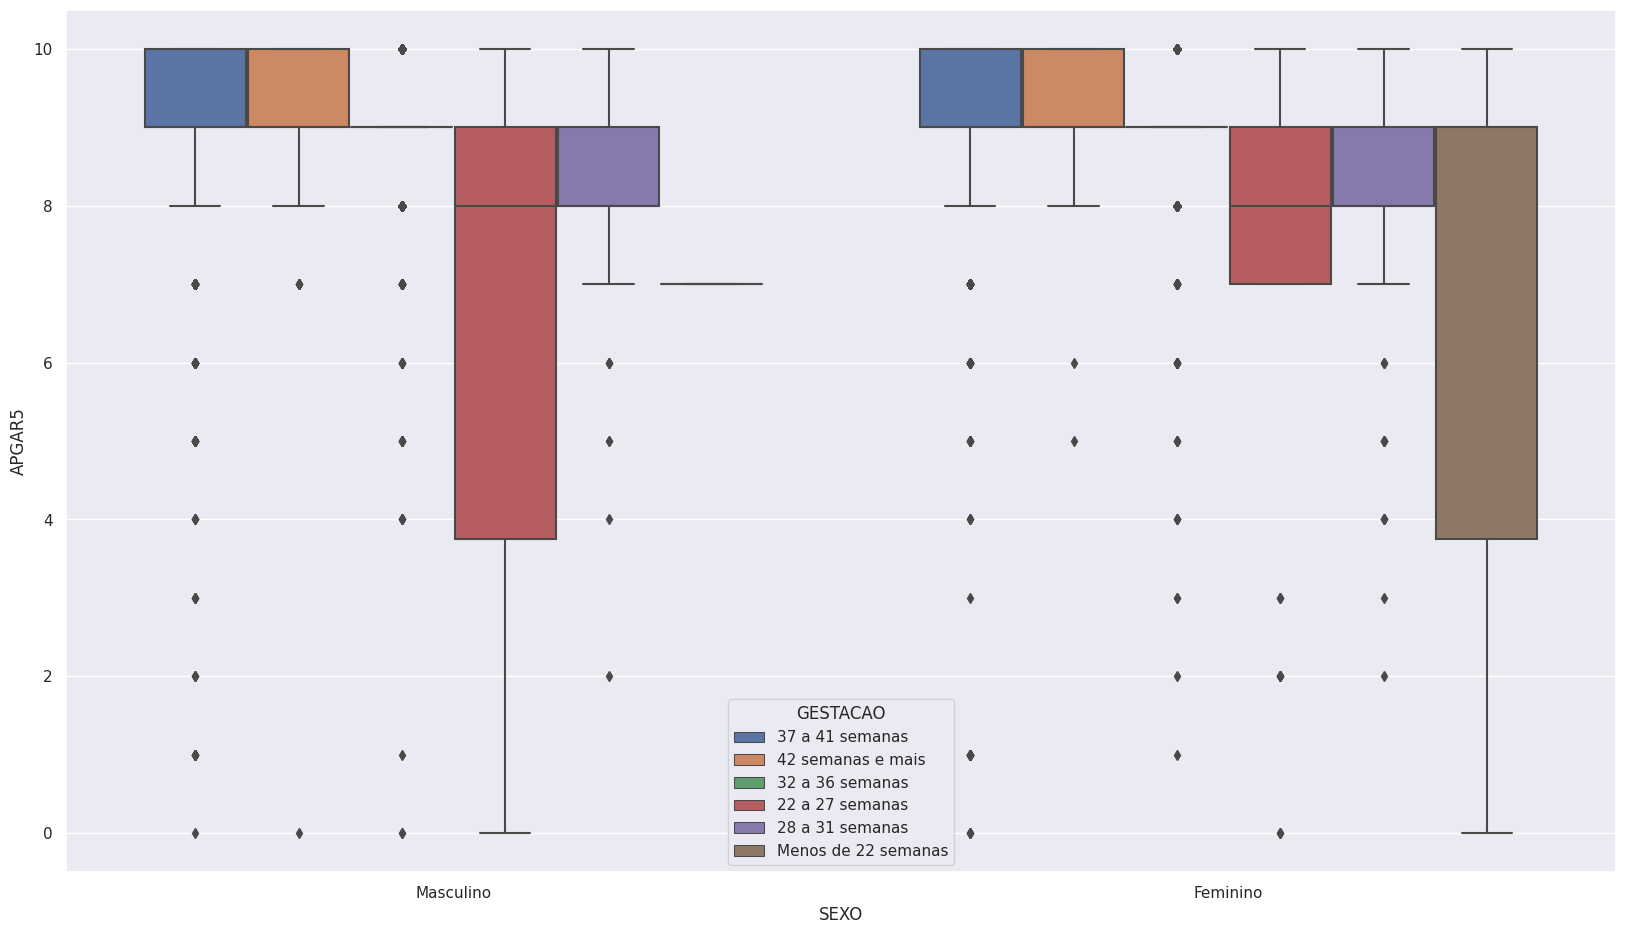

In [98]:
sns.set(rc={'figure.figsize':(20,11.2)})

sns.boxplot(x='SEXO', y='APGAR5', hue='GESTACAO', data=sinasc)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [103]:
APGAR_GEST = pd.crosstab(sinasc['APGAR5'], sinasc['GESTACAO'])
APGAR_GEST

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5,,,,,,
0.0,7,0,2,5,1,1
1.0,0,0,2,20,0,0
2.0,8,2,2,3,0,1
3.0,6,1,2,5,0,0
4.0,1,5,8,7,0,0
5.0,0,7,11,21,1,0
6.0,2,7,17,45,1,0
7.0,10,11,56,151,5,1
8.0,24,61,362,1417,44,0


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [132]:
APG_GEST_pct = APGAR_GEST.div(APGAR_GEST.sum(1).astype(float), axis=0)
APG_GEST_pct

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5,,,,,,
0.0,0.437500,0.000000,0.125000,0.312500,0.062500,0.062500
1.0,0.000000,0.000000,0.090909,0.909091,0.000000,0.000000
2.0,0.500000,0.125000,0.125000,0.187500,0.000000,0.062500
3.0,0.428571,0.071429,0.142857,0.357143,0.000000,0.000000
4.0,0.047619,0.238095,0.380952,0.333333,0.000000,0.000000
5.0,0.000000,0.175000,0.275000,0.525000,0.025000,0.000000
6.0,0.027778,0.097222,0.236111,0.625000,0.013889,0.000000
7.0,0.042735,0.047009,0.239316,0.645299,0.021368,0.004274
8.0,0.012579,0.031971,0.189727,0.742662,0.023061,0.000000


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='APGAR5'>

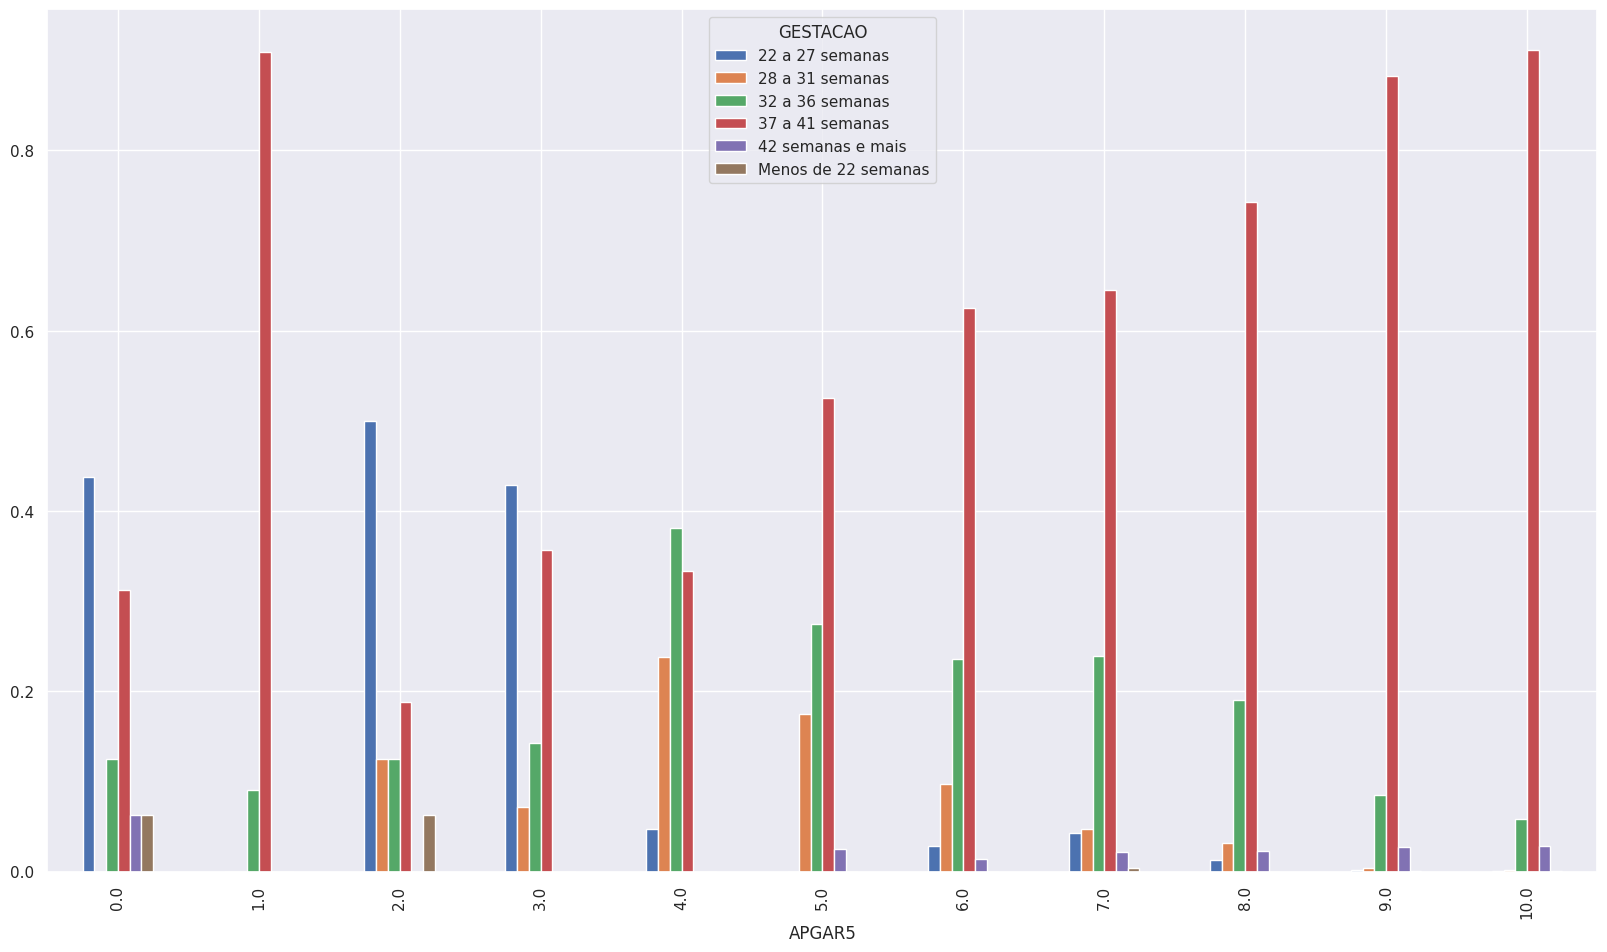

In [110]:
APG_GEST_pct.plot.bar()

## É possível concluir que os médicos estão certos, pois partos com menos de 37 semanas apresentam maiores proporções de baixo APGAR5, o que é um dos indicadores de saúde do recém-nascido.
## Olhando o gráfico para os niveis mais baixos de APGAR5 é possível que essa conclusão fique dúbia, devido a grande presença de partos com gestações 'normais', mas deve-se levar em consideração também que números muito baixos de APGAR5 são raros
# então qualquer nascimento nessa condição implica muito na porcentagem dos casos.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

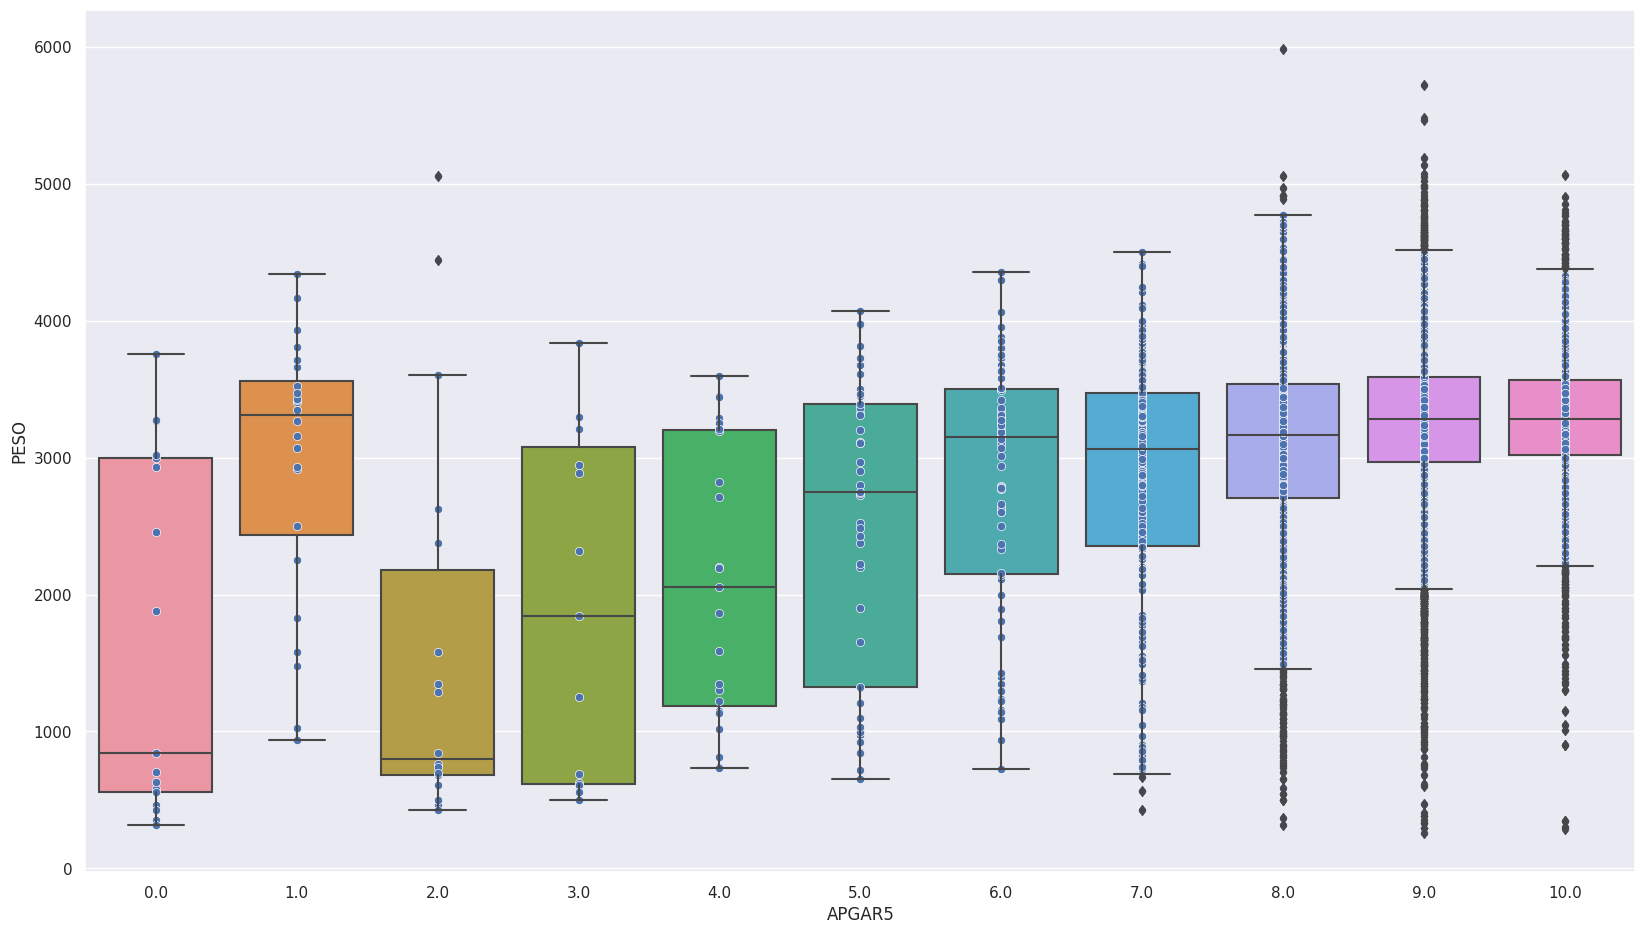

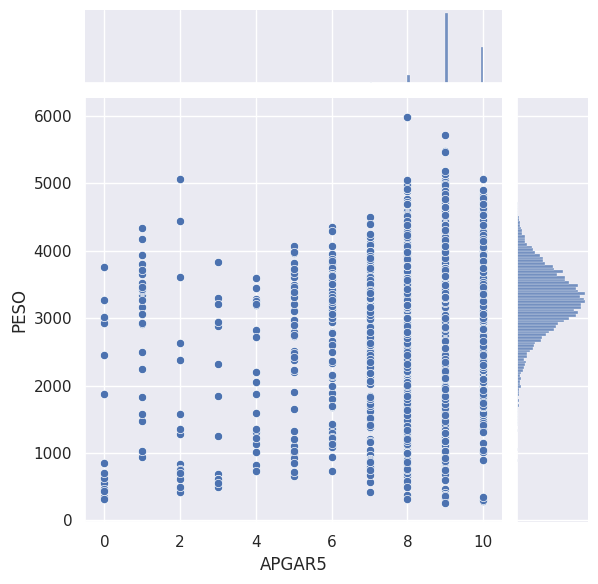

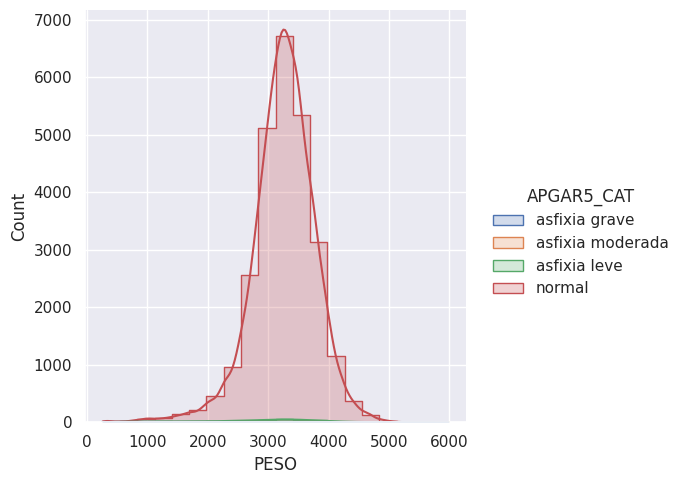

In [128]:
sns.scatterplot(x='APGAR5', y='PESO', data=sinasc)
sns.boxplot(x='APGAR5', y='PESO', data=sinasc)
sns.jointplot(x='APGAR5', y='PESO', data=sinasc)
sns.displot(x='PESO', hue='APGAR5_CAT', data=sinasc, element='step', bins=20, kde=True)